<a href="https://colab.research.google.com/github/mihirahuja1/FakeTweetsPrediction/blob/master/Explorattory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author - Mihir Ahuja

Data Citation - https://www.kaggle.com/c/nlp-getting-started

Other Citation - Citaion For  https://www.kaggle.com/ratan123/start-from-here-disaster-tweets-eda-basic-model (Snippets used)

Setup

In [59]:
import pandas as pd
import numpy as np
import re
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
import collections
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Reading the data

In [2]:
train = pd.read_csv('/content/drive/My Drive/TweetPrediction/train.csv')
test = pd.read_csv('/content/drive/My Drive/TweetPrediction/test.csv')

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


Citation

In [5]:
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

def removeurl(raw_text):
    clean_text = re.sub(r'^https?:\/\/.*[\r\n]*', '', raw_text, flags=re.MULTILINE)
    return clean_text



End of citation

In [6]:
train['text'] = train['text'].apply(lambda x: cleanhtml(x))
test['text'] = test['text'].apply(lambda x: cleanhtml(x))

train['text'] = train['text'].apply(lambda x:removeurl(x))
test['text'] = test['text'].apply(lambda x: removeurl(x))

In [7]:
train['text'] = train['text'].map(lambda x: re.sub(r'\W+', ' ', x))
test['text'] = test['text'].map(lambda x: re.sub(r'\W+', ' ', x))


In [8]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked to shelter in place are be...,1
3,6,NaN,NaN,13 000 people receive wildfires evacuation ord...,1
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,aria_ahrary TheTawniest The out of control wi...,1
7610,10871,NaN,NaN,M1 94 01 04 UTC 5km S of Volcano Hawaii http t...,1
7611,10872,NaN,NaN,Police investigating after an e bike collided ...,1


#Distributio of Target Column

In [9]:
fig = px.bar(train.groupby('target')['target'].count().reset_index(name='count'), x='target', y='count',color='target')
fig.show()

Tweet count grouped by location

In [10]:
data = train.groupby('location')['location'].count().reset_index(name='count').sort_values(by='count',ascending=False)

In [11]:
data = data.head(20)

In [12]:
fig = px.bar(data, x='location', y='count',color='location')
fig.show()

Tweets distribution per location

In [13]:
data = train.groupby(['location','target'])['location'].count().reset_index(name='count').sort_values(by='count',ascending=False)

In [14]:
data = data.head(20)

In [15]:
fig = px.bar(data, x="location", y='count',color='target')
fig.show()

Word Cloud

In [16]:

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


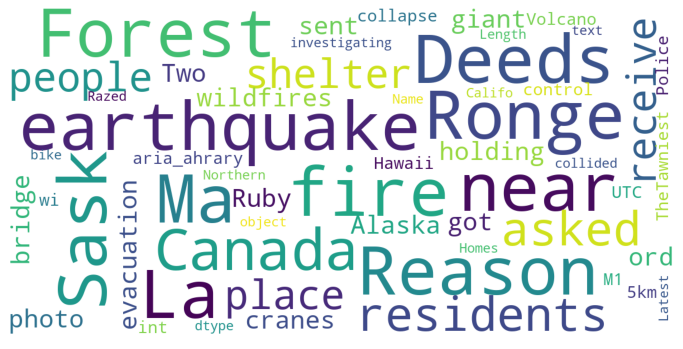

In [17]:
show_wordcloud(train[train['target']==1]['text'])

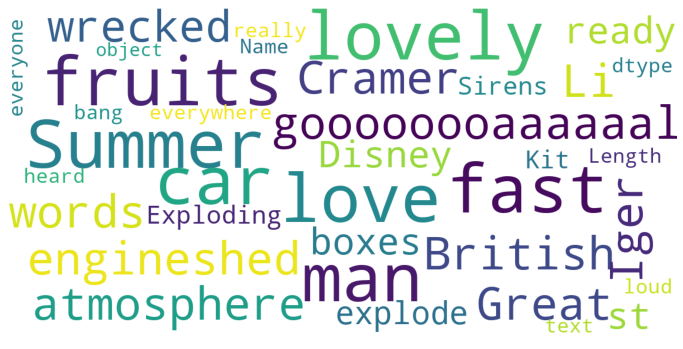

In [18]:
show_wordcloud(train[train['target']==0]['text'])

- Evident from word cloud that words belonging to different targets differ greatly

- Words Occuring in Target class 1
  - Fire 
  - Earthquake
  - people
  - Shelter
  - evacuation

- Words Occuring in Target class 0
  - Summer
  - fruits
  - lovely
  - Disney

Word Frequency 

In [19]:
data = train[train['target']==1].text.str.split(expand=True).stack().value_counts().reset_index(name='count')

In [20]:
data

,index,count
0,t,2538
1,co,2411
2,http,2277
3,the,1060
4,in,1036
...,...,...
13432,claiming,1
13433,JohnEJefferson,1
13434,africans,1
13435,Acrylic,1


In [21]:
fig = px.bar(data.head(50), x="count", y="index", orientation='h',color_discrete_sequence=px.colors.qualitative.Light24)
fig.show()

In [22]:
data = train[train['target']==0].text.str.split(expand=True).stack().value_counts().reset_index(name='count')

In [23]:
fig = px.bar(data.head(50), x="count", y="index", orientation='h',color_discrete_sequence=px.colors.qualitative.Light24)
fig.show()

Bi-Grams Count

In [24]:
counts = collections.Counter()
for sent in train[train['target']==1]['text']:
    words = nltk.word_tokenize(sent)
    counts.update(nltk.bigrams(words))

In [25]:
data = pd.DataFrame.from_dict(counts, orient='index').reset_index()

In [26]:
data = data.sort_values(by=0,ascending=False)

In [27]:
data.columns = ['Bi-gram','Count']

In [28]:
data['Bi-gram'] = data['Bi-gram'].astype(str)
data['Count'] = data['Count'].astype(int)

In [29]:
fig = px.bar(data.head(50), x="Count", y="Bi-gram", orientation='h',color_discrete_sequence=px.colors.qualitative.Light24)
fig.show()

In [30]:
counts = collections.Counter()
for sent in train[train['target']==0]['text']:
    words = nltk.word_tokenize(sent)
    counts.update(nltk.bigrams(words))
data = pd.DataFrame.from_dict(counts, orient='index').reset_index()
data = data.sort_values(by=0,ascending=False)
data.columns = ['Bi-gram','Count']
data['Bi-gram'] = data['Bi-gram'].astype(str)
data['Count'] = data['Count'].astype(int)
fig = px.bar(data.head(70), x="Count", y="Bi-gram", orientation='h',color_discrete_sequence=px.colors.qualitative.Light24)
fig.show()

In [31]:
#Creating Meta Features

- Number of words
- Number of Sentences
- Number of Unique Words
- Number of Stop words


In [49]:
train = pd.read_csv('/content/drive/My Drive/TweetPrediction/train.csv')
test = pd.read_csv('/content/drive/My Drive/TweetPrediction/test.csv')

In [50]:
train['text'] = train['text'].apply(lambda x: cleanhtml(x))
test['text'] = test['text'].apply(lambda x: cleanhtml(x))

train['text'] = train['text'].apply(lambda x:removeurl(x))
test['text'] = test['text'].apply(lambda x: removeurl(x))

In [51]:
train['text'] = train['text'].astype(str)
test['text'] = test['text'].astype(str)

In [62]:
def number_of_words(tweet):
  return len(word_tokenize(tweet))
#number_of_words('Our Deeds are')

In [63]:
train['Number_of_words'] = train['text'].apply(lambda x: number_of_words(x))
test['Number_of_words'] = test['text'].apply(lambda x: number_of_words(x))


In [64]:
def number_of_sentences(tweet):

   return len(sent_tokenize(tweet))


In [65]:
train['Number_of_Sentences'] = train['text'].apply(lambda x: number_of_sentences(x))
test['Number_of_Sentences'] = test['text'].apply(lambda x: number_of_sentences(x))


In [69]:
def Number_of_Unique_Words(tweet):
  return len(set(tweet.split()))

In [71]:
train['Number_of_Unique_Words'] = train['text'].apply(lambda x: Number_of_Unique_Words(x))
test['Number_of_Unique_Words'] = test['text'].apply(lambda x: Number_of_Unique_Words(x))


In [78]:
def Number_of_Stop_Words(tweet):
  word_tokens = word_tokenize(tweet) #splitta i pezzi

  stopwords_x = [w for w in word_tokens if w in STOPWORDS]

  return len(stopwords_x)

In [80]:
train['Number_of_Stop_Words'] = train['text'].apply(lambda x: Number_of_Stop_Words(x))
test['Number_of_Stop_Words'] = test['text'].apply(lambda x: Number_of_Stop_Words(x))


In [84]:
train.to_csv('/content/drive/My Drive/TweetPrediction/train_v2.csv')

In [85]:
test.to_csv('/content/drive/My Drive/TweetPrediction/test_v2.csv')